1. Load data
2. **Preprocess data**
3. Build network
4. Train
5. Test

In [1]:
from IPython.display import YouTubeVideo

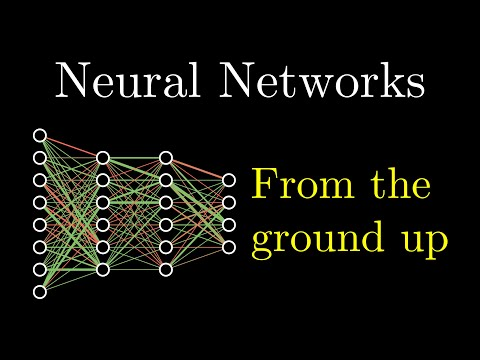

In [2]:
YouTubeVideo('aircAruvnKk', width=800, height=300)

Step two: preprocess data.

The data has to be 'reshaped' to a form that is acceptable to the network

The network will expect samples as vectors (1D arrays) of floating point values

The data has to be 'reshaped' to a form that is acceptable to the network. The network will expect samples as vectors (1D arrays) of floating point values

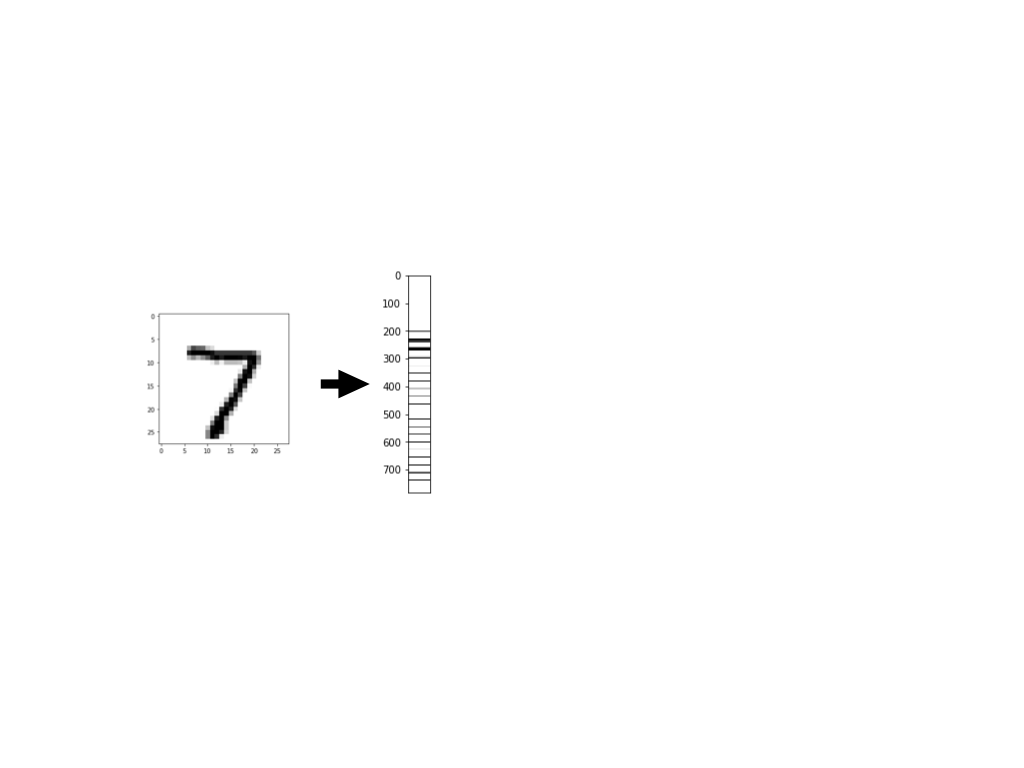

The image pixel map has to be straightened into a line of values.

sample:


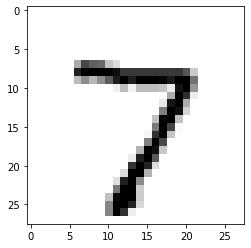

label:  7


In [1]:
# download
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# inspect the first image using the matplotlib graphics library
import matplotlib.pyplot as plt
xmpl_image = test_images[0]
xmpl_label = test_labels[0]
print('sample:')
plt.imshow(xmpl_image, cmap=plt.cm.binary)
plt.show()

# check the label is correct
print('label: ', xmpl_label)

We shall be using the matplotlib graphics library. Here is a chunk of code for displaying a greyscale image. We also check that the label is correct.

In [2]:
# reshape flattens 28 x 28 array to a vector of 784 elements
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

# cast as floats and rescale from to [0, 1]
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Preprocessing has three steps: the 2D pixel map is flattened with a call to `reshape`. The shape tuple of the desired result is supplied in the call - in this case as `(60000, 28 * 28)`, that is, a two dimensional array of size 60,000 by 784. The integers are cast to float and finally rescaled to lie between 0 and 1. 

The network is also expecting categorically encoded labels

- a vector with a single nonzero element corresponding to the category

The network will require 'categorically' encoded labels. This is a seemingly wasteful change of representation to a vector of zero's except for a single '1'. 

Each label will be turned into a 10 element vector with a single 'hot' nonzero entry 

For example, '7' is encoded as $(0, 0, 0, 0, 0, 0, 0, 1, 0, 0)$

**One-hot** encoding

The single one or hot entry is at a position in the vector that corresponds to the label category. For example, '7' is encoded with a 1 in the eighth slot. Categorical encoding is frequently known as 'one-hot' encoding.

In [3]:
# encode with the convenient to_categorical function
from tensorflow.keras.utils import to_categorical

orig_label = test_labels[0]
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# check encoding 
print('\'', orig_label, '\'', 'as one-hot vector:\t', test_labels[0], sep='')

'7'as one-hot vector:	[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Conversion to one-hot encoding is easy - a call to `to-categorical`. We can check the encoding is correct by comparing before and after